In [5]:
from cosmoslik_plugins.samplers.metropolis_hastings import load_chain
%pylab
%matplotlib inline
import pandas as pd

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [7]:
temp = load_chain('test.chain').burnin(1000).join()

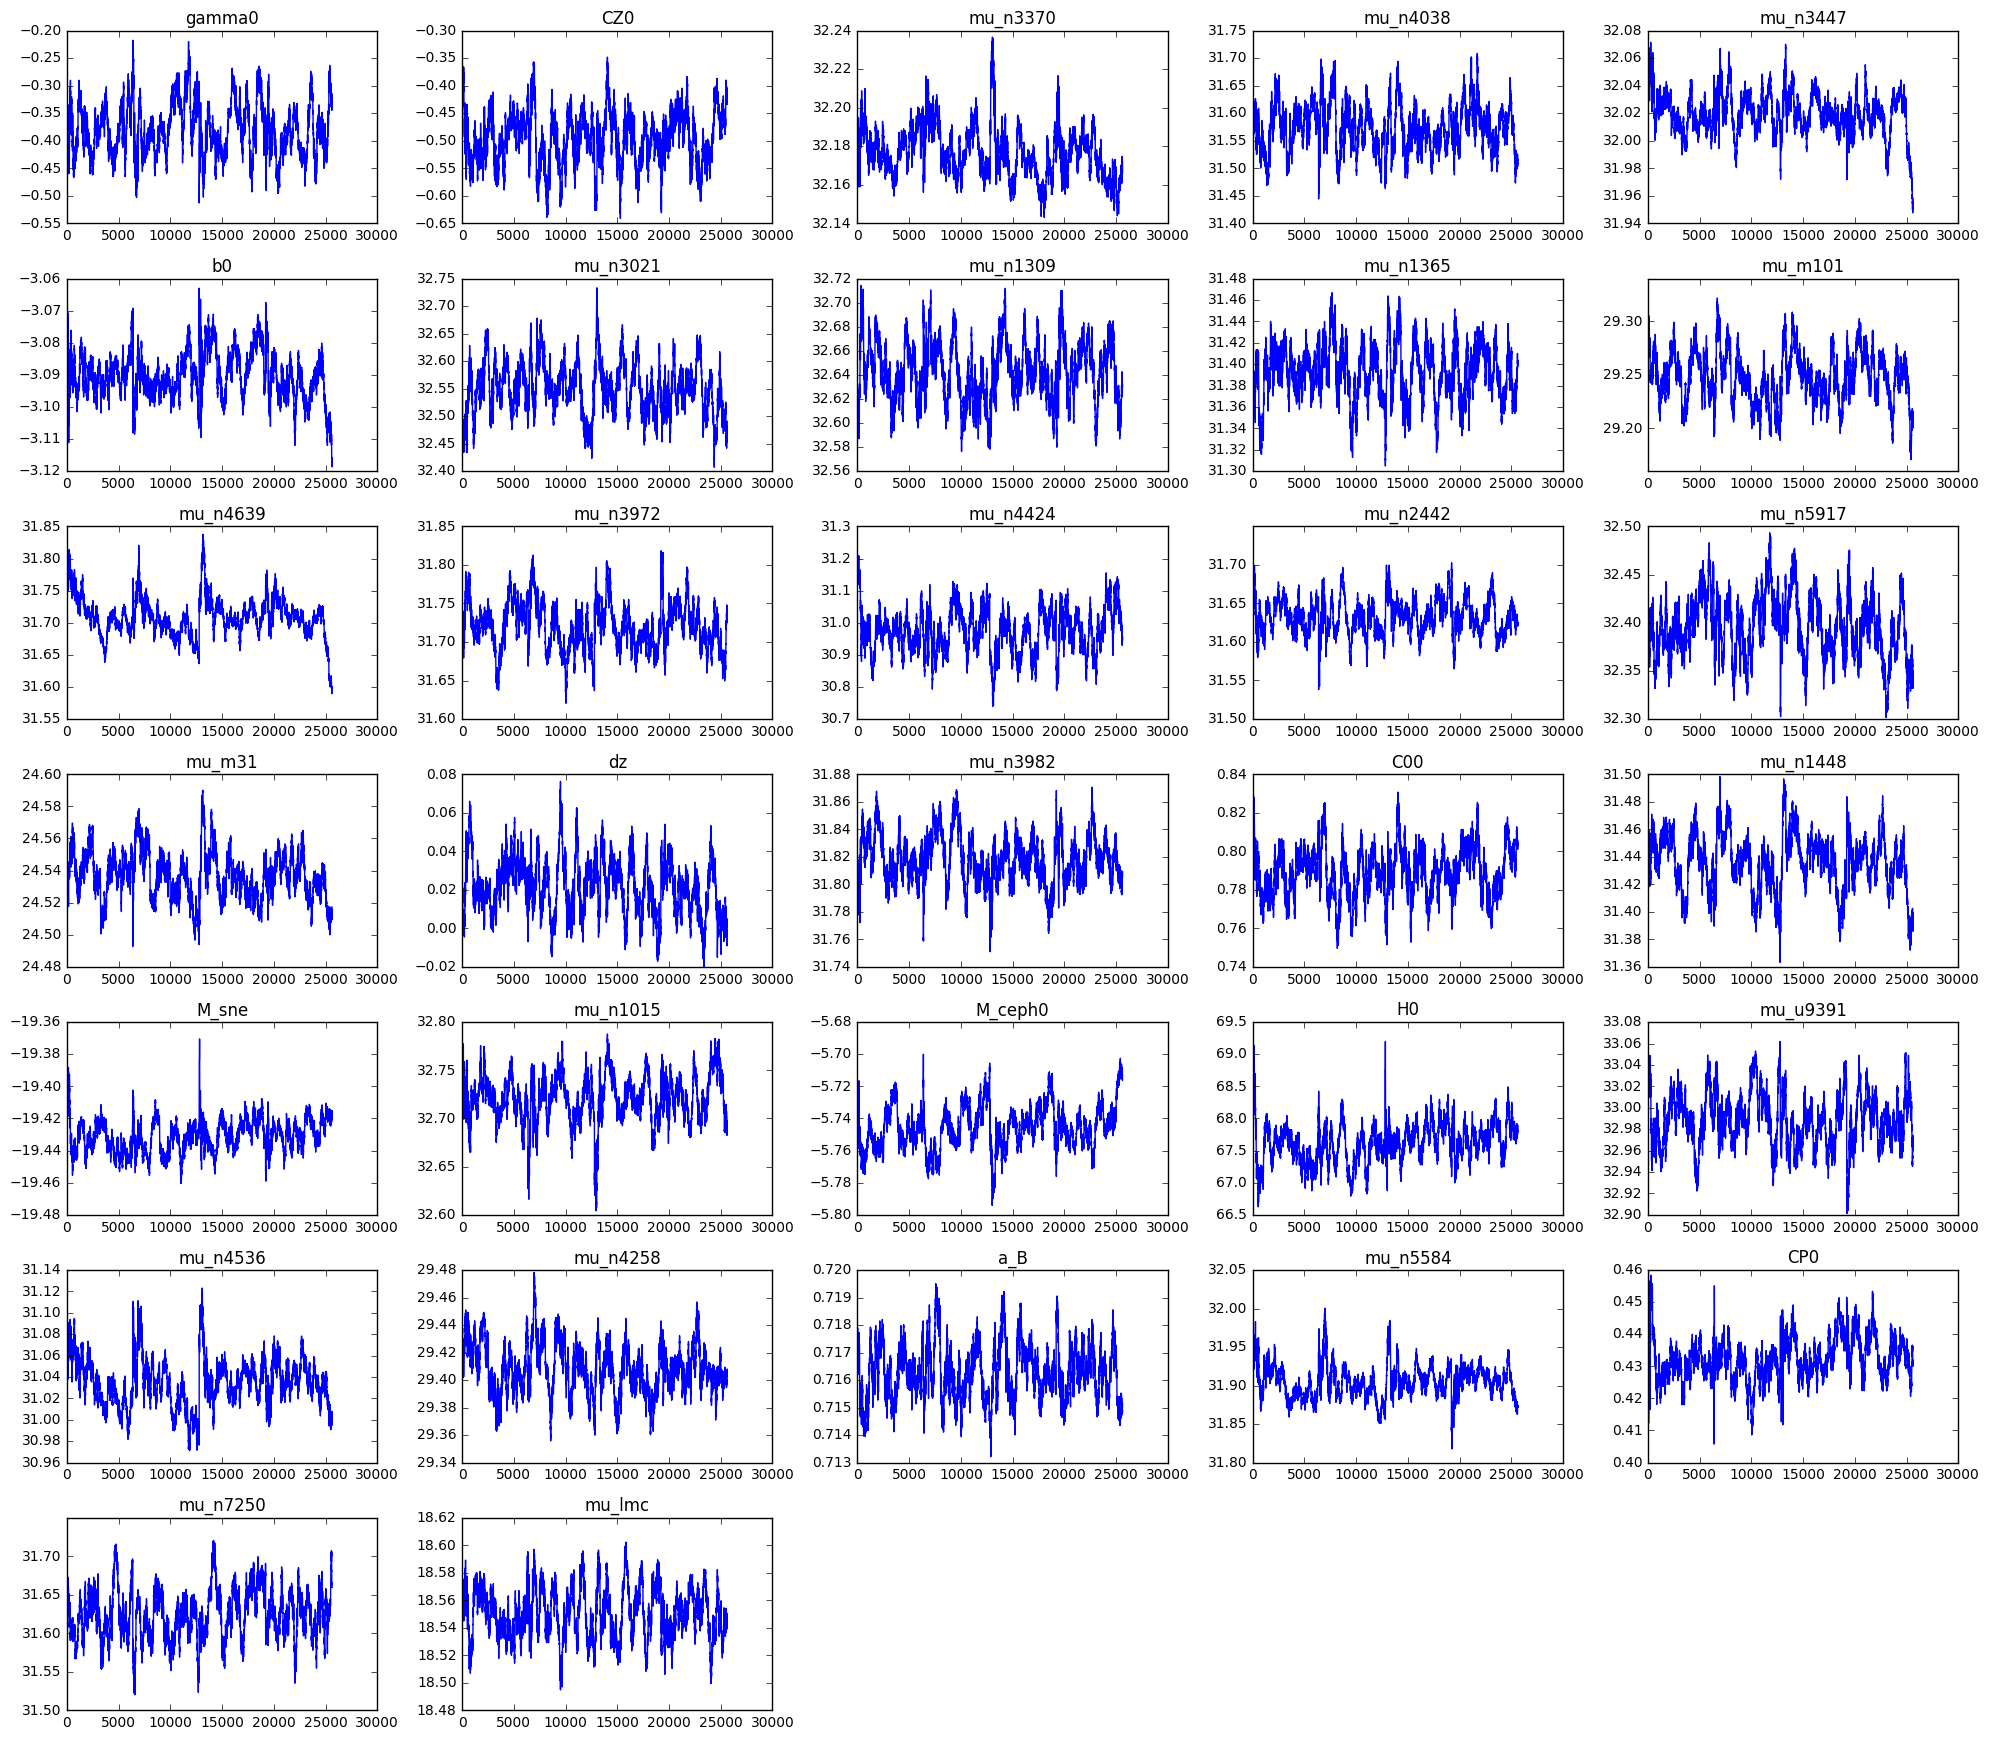

In [6]:
temp.plot()

In [8]:
temp.savecov('proposal.covmat')

In [1]:
def get_data():
    '''
    Grabs the cepheids and sne from the R16 sample
    returns: 
        cepheids: Cepheid dataframe
        sne: sne dataframe
    '''
    filename = '../data/r16_table4.out'
    sne_start = 40
    sne_end = 59
    sne_lines = arange(sne_start,sne_end)
    sne = pd.DataFrame(columns = ['Host', 'sne', 'm^B_0', 'err'], index = arange(sne_end - sne_start))
    ceph_start = 70
    ceph_end = 2346
    cepheid_lines = arange(ceph_start,ceph_end)
    cepheids = pd.DataFrame(columns = ['Field','RA','DEC','ID','Period','VminusI','m_H','sigma_tot','Z'], 
                            index = arange(ceph_end - ceph_start),
                           dtype = 'float')
    f = file(filename)
    for i, line in enumerate(f):
        if i in sne_lines:
            sne.loc[i-sne_start] = line.lower().split()
        if i in cepheid_lines:
            cepheids.loc[i-ceph_start] = line.lower().split()

    f.close()
    cepheids = cepheids.apply(lambda x: pd.to_numeric(x, errors='ignore') );

    sne = sne.apply(lambda x: pd.to_numeric(x, errors='ignore') );


    parallaxes = {'bgcru': (2.23, 0.30,-0.15), 
                  'dtcyg':(2.19,0.33, -0.18), 
                  'ffaql':(2.64,0.16, -0.03),
                  'rtaur':(2.31, 0.19,-0.06),
                  'sscma':(0.348, 0.038, -0.04),
                  'sucas':(2.57,  0.33, -0.13 ),
                  'syaur':(0.428, 0.054, -0.04),
                  'tvul':(2.06,0.22,-0.09 ),
                  'wsgr':(2.30, 0.19, -0.06),
                  'xsgr':(3.17, 0.14, -0.02),
                  'ysgr':(2.13, 0.29, -0.15),
                  'betador':(3.26, 0.14, -0.02),
                  'delceph':(3.71,0.12,-0.01),
                  'etagem':(2.74,0.12,-0.02),
                  'lcar':(2.03,0.16,-0.05)
                 }
    parallaxes = pd.DataFrame.from_dict(parallaxes, orient = 'index', )
    parallaxes.reset_index(inplace=True)
    parallaxes.columns = ['ID', 'parallax', 'p_err', 'LK']
    cepheids = cepheids.merge(parallaxes, on = 'ID', how = 'left')


    cepheids.fillna({'parallax':1e-03, 'p_err':0, 'LK':0}, inplace = True);
    cepheids['err'] = sqrt(cepheids.sigma_tot**2 + (cepheids.p_err / cepheids.parallax * 5/log(10))**2)
    return cepheids, sne

In [6]:
cepheids, sne = get_data()

In [7]:
cepheids.sample(10)

,Field,RA,DEC,ID,Period,VminusI,m_H,sigma_tot,Z,parallax,p_err,LK,err
547,n3021,147.72787,33.55892,141178,36.380,1.27,25.35,0.298,8.936,0.001,0.0,0.0,0.298
2247,lmc,0.00000,0.00000,ogl-2781,2.997,1.11,14.72,0.106,8.650,0.001,0.0,0.0,0.106
1351,m31,11.41555,41.91052,m31_ceph,11.170,1.21,18.75,0.147,8.900,0.001,0.0,0.0,0.147
2191,lmc,0.00000,0.00000,ogl-1688,3.092,0.93,14.53,0.101,8.650,0.001,0.0,0.0,0.101
989,n4258,184.85165,47.22660,c053,18.320,1.00,23.21,0.190,8.735,0.001,0.0,0.0,0.190
1661,lmc,0.00000,0.00000,ogl-1678,6.416,0.83,13.43,0.089,8.650,0.001,0.0,0.0,0.089
120,m101,210.86427,54.34260,677641,20.480,0.86,22.04,0.217,9.171,0.001,0.0,0.0,0.217
1387,m31,11.49611,42.06826,m31_ceph,7.768,1.22,19.20,0.147,8.900,0.001,0.0,0.0,0.147
426,n2442,114.08421,-69.54918,119156,22.040,1.07,25.36,0.690,9.100,0.001,0.0,0.0,0.690
238,m101,210.69066,54.33874,345893,11.300,0.97,23.53,0.234,9.082,0.001,0.0,0.0,0.234


In [8]:
def check_existance(obj):
    if isinstance(obj, pd.DataFrame):
        return True
    else:
        return False

In [10]:
isinstance(apple, pd.DataFrame)

NameError: name 'apple' is not defined